<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import tensorflow as tf

# tf.config.list_physical_devices("GPU")

In [4]:
# import gdown
# url = 'https://drive.google.com/u/0/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB&export=download'
# output = '/content/drive/MyDrive/cat_dog_data.zip' # colab
# gdown.download(url, output, quiet=False)

In [5]:
# import zipfile

# # Unzip the file
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cat_dog_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [6]:
my_data_dir = "data"

In [7]:
os.listdir(my_data_dir) 

['test', 'train', 'validation']

# Recognizing and Understanding Data

In [8]:
test_path = my_data_dir + '/test/'
train_path = my_data_dir + '/train/'
validation_path = my_data_dir + '/validation/'


In [9]:
# print("test folder :", os.listdir(test_path)) 
print("train folder :", os.listdir(train_path))
print("validation folder :", os.listdir(validation_path))

train folder : ['cat', 'dog']
validation folder : ['cat', 'dog']


In [10]:
# os.listdir(test_path)

In [11]:
os.listdir(train_path)

['cat', 'dog']

In [12]:
classes = os.listdir(train_path)
classes

['cat', 'dog']

**Let's check how many images there are.**

In [13]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

In [14]:
for dirpath, dirnames,filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in data
There are 0 directories and 6897 images in data\test
There are 2 directories and 0 images in data\train
There are 0 directories and 12500 images in data\train\cat
There are 0 directories and 5026 images in data\train\dog
There are 2 directories and 0 images in data\validation
There are 0 directories and 1219 images in data\validation\cat
There are 0 directories and 1071 images in data\validation\dog


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [15]:
os.listdir(train_path+'cat')[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

In [16]:
os.listdir(train_path+'cat')[5]

'cat.10000.jpg'

In [17]:
cat_path = train_path+'cat'+'/cat.7966.jpg'
cat_path

'data/train/cat/cat.7966.jpg'

In [18]:
cat = imread(cat_path)
cat

array([[[111,  99, 101],
        [115, 103, 105],
        [120, 108, 110],
        ...,
        [ 74,  62,  62],
        [ 71,  59,  59],
        [ 69,  57,  57]],

       [[114, 102, 104],
        [118, 106, 108],
        [123, 111, 113],
        ...,
        [ 75,  63,  63],
        [ 72,  60,  60],
        [ 70,  58,  58]],

       [[119, 107, 107],
        [123, 111, 113],
        [128, 116, 118],
        ...,
        [ 75,  63,  63],
        [ 73,  61,  61],
        [ 70,  58,  58]],

       ...,

       [[ 37,  31,  17],
        [ 36,  30,  16],
        [ 36,  30,  16],
        ...,
        [126, 112, 101],
        [130, 116, 105],
        [135, 121, 110]],

       [[ 36,  30,  16],
        [ 36,  30,  16],
        [ 35,  29,  15],
        ...,
        [177, 163, 154],
        [177, 163, 154],
        [176, 162, 153]],

       [[ 36,  30,  16],
        [ 35,  29,  15],
        [ 35,  29,  15],
        ...,
        [192, 177, 172],
        [190, 175, 170],
        [187, 172, 167]]

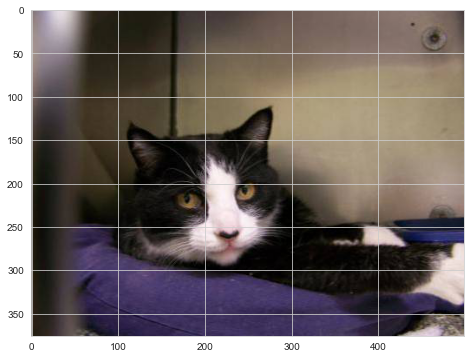

In [19]:
plt.imshow(cat)

In [20]:
os.listdir(train_path+'dog')[12]

'2478.jpg'

In [21]:
dog_path = train_path+'dog'+'/dog.2395.jpg'
dog_path

'data/train/dog/dog.2395.jpg'

In [22]:
dog = imread(dog_path)
dog

array([[[153, 109, 134],
        [146, 111, 133],
        [138, 113, 132],
        ...,
        [196, 211, 232],
        [196, 211, 232],
        [196, 211, 232]],

       [[151, 117, 134],
        [147, 119, 134],
        [139, 121, 133],
        ...,
        [196, 211, 232],
        [196, 211, 232],
        [196, 211, 232]],

       [[142, 123, 129],
        [139, 124, 129],
        [133, 127, 129],
        ...,
        [196, 211, 232],
        [196, 211, 232],
        [196, 211, 232]],

       ...,

       [[230, 244, 245],
        [225, 239, 240],
        [228, 242, 243],
        ...,
        [249, 253, 254],
        [250, 254, 255],
        [251, 255, 255]],

       [[232, 248, 248],
        [227, 243, 243],
        [230, 246, 246],
        ...,
        [249, 253, 254],
        [250, 254, 255],
        [251, 255, 255]],

       [[234, 250, 250],
        [229, 245, 245],
        [232, 248, 248],
        ...,
        [249, 253, 254],
        [250, 254, 255],
        [251, 255, 255]]

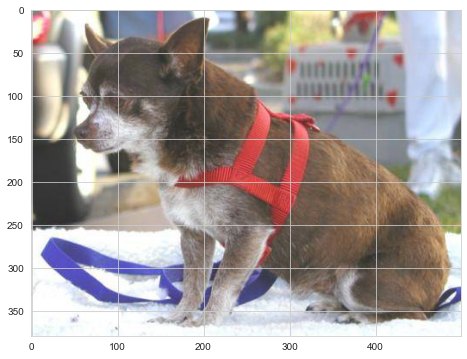

In [23]:
plt.imshow(dog)

In [24]:
cat.shape

(376, 499, 3)

In [25]:
dog.shape

(379, 499, 3)

In [26]:
import random
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (200, 149, 3)


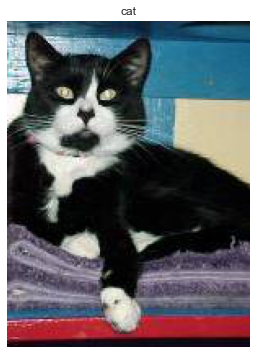

In [27]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (399, 500, 3)


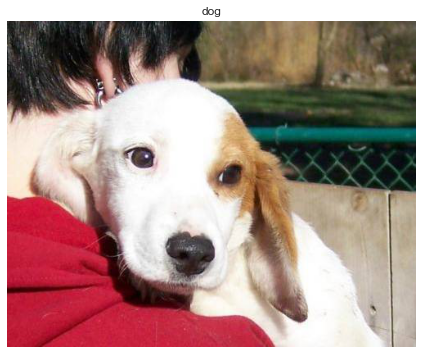

In [28]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (427, 499, 3)


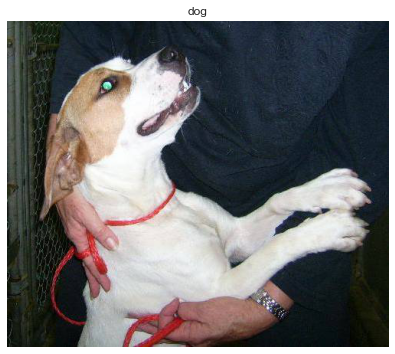

In [29]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(classes)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [30]:
cat.shape

(376, 499, 3)

In [31]:
dog.shape

(379, 499, 3)

In [32]:
x = [imread(train_path+"cat/"+image).shape[0] for image in os.listdir(train_path+"cat")]
y = [imread(train_path+"cat/"+image).shape[1] for image in os.listdir(train_path+"cat")]

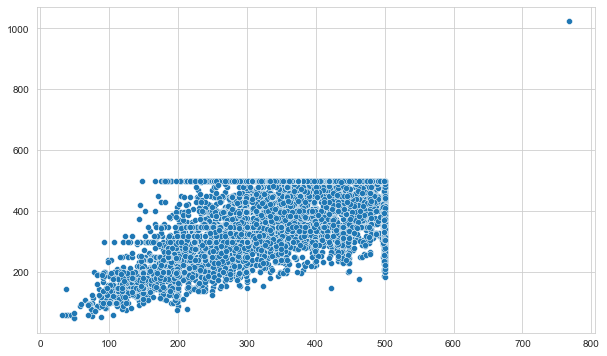

In [33]:
sns.scatterplot(x, y);

In [34]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [35]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [36]:
image_shape = (374,470,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [37]:
cat.max()

255

In [38]:
cat.min()

0

In [39]:
dog.max()

255

In [40]:
dog.min()

28

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

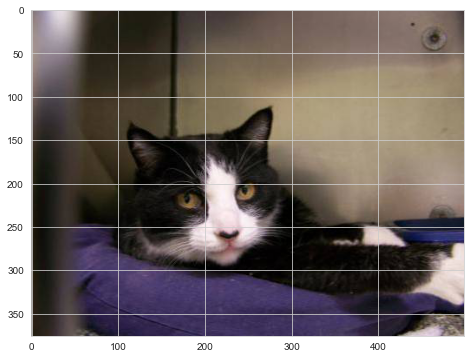

In [43]:
plt.imshow(cat)

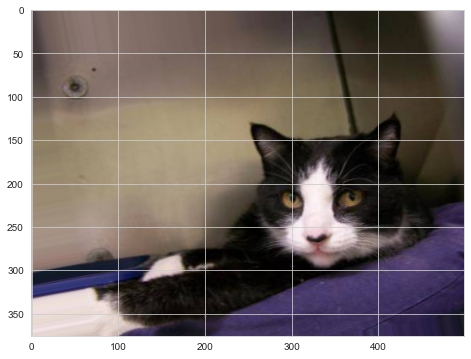

In [44]:
plt.imshow(image_gen.random_transform(cat))

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [45]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [46]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [47]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [48]:
batch_size = 32

In [49]:
image_shape

(374, 470, 3)

In [50]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [51]:
validation_image_gen = image_gen.flow_from_directory(directory=validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [52]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [53]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [54]:
# train_image_gen[0]

In [55]:
train_image_gen[0][0].shape

(32, 374, 470, 3)

In [56]:
train_image_gen[0][0][0].shape

(374, 470, 3)

In [57]:
len(train_image_gen), len(validation_image_gen)

(548, 72)

# Modelling-1

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [74]:
model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(128, activation="relu"))
model1.add(Dropout(0.2))

model1.add(Dense(64, activation="relu"))
model1.add(Dropout(0.2))

model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [75]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 372, 468, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 186, 234, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 184, 232, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 92, 116, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 114, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 57, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82080)            

In [76]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

In [77]:
model1.fit(train_image_gen, 
           epochs=10,
           steps_per_epoch=len(train_image_gen),
           validation_data=validation_image_gen,
           validation_steps=len(validation_image_gen),
           callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 1318s 2s/step - loss: 0.5954 - acc: 0.7201 - val_loss: 0.7087 - val_acc: 0.5585
Epoch 2/10
548/548 [==============================] - 1267s 2s/step - loss: 0.5289 - acc: 0.7514 - val_loss: 0.5950 - val_acc: 0.6590
Epoch 3/10
548/548 [==============================] - 741s 1s/step - loss: 0.4814 - acc: 0.7780 - val_loss: 0.6214 - val_acc: 0.6594
Epoch 4/10
548/548 [==============================] - 557s 1s/step - loss: 0.4551 - acc: 0.7954 - val_loss: 0.5187 - val_acc: 0.7528
Epoch 5/10
548/548 [==============================] - 529s 966ms/step - loss: 0.4392 - acc: 0.7983 - val_loss: 0.5132 - val_acc: 0.7624
Epoch 6/10
548/548 [==============================] - 526s 960ms/step - loss: 0.4251 - acc: 0.8104 - val_loss: 0.5364 - val_acc: 0.7384
Epoch 7/10
548/548 [==============================] - 527s 961ms/step - loss: 0.4143 - acc: 0.8184 - val_loss: 0.5853 - val_acc: 0.7057
Epoch 8/10
548/548 [==============================] - 528s

In [78]:
summary = pd.DataFrame(model1.history.history)

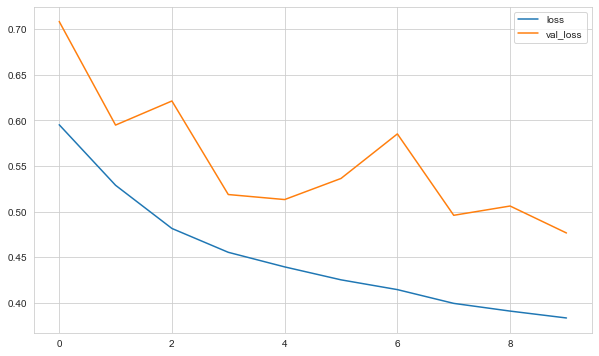

In [79]:
summary[["loss", "val_loss"]].plot();

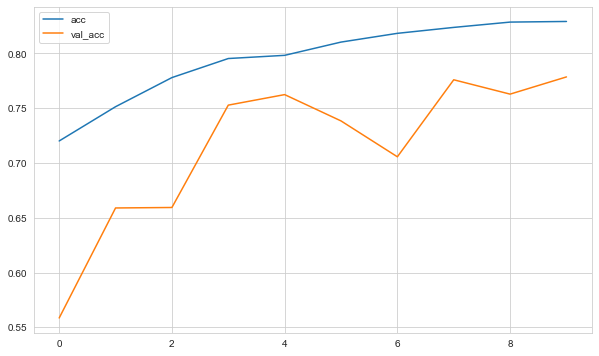

In [80]:
summary[["acc", "val_acc"]].plot();

In [105]:
gpu_config = tf.GPUOptions()
gpu_config.visible_device_list = "0,1"
session = tf.Session(config=tf.ConfigProto(gpu_options=gpu_config))

# Modelling-2

In [59]:
model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())

model2.add(Dense(128, activation="relu"))

model2.add(Dense(64, activation="relu"))

model2.add(Dense(1, activation="relu"))


model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [60]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 372, 468, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 372, 468, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 186, 234, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 184, 232, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 184, 232, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 92, 116, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 114, 32)       9

In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [62]:
model2.fit(train_image_gen, 
           epochs=10,
           steps_per_epoch=len(train_image_gen),
           validation_data=validation_image_gen,
           validation_steps=len(validation_image_gen),
           callbacks=[early_stop])

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
548/548 [==============================] - 1010s 2s/step - loss: 6.9248 - acc: 0.5486 - val_loss: 6.4165 - val_acc: 0.5834
Epoch 2/10
548/548 [==============================] - 938s 2s/step - loss: 6.2802 - acc: 0.5915 - val_loss: 7.0321 - val_acc: 0.5437
Epoch 3/10
548/548 [==============================] - 818s 1s/step - loss: 6.8220 - acc: 0.5559 - val_loss: 6.6794 - val_acc: 0.5668


In [63]:
summary = pd.DataFrame(model2.history.history)

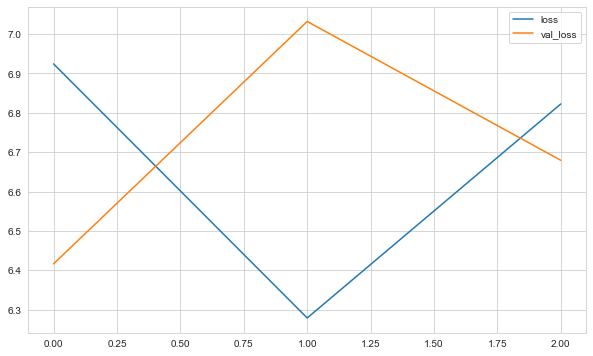

In [64]:
summary[["loss", "val_loss"]].plot();

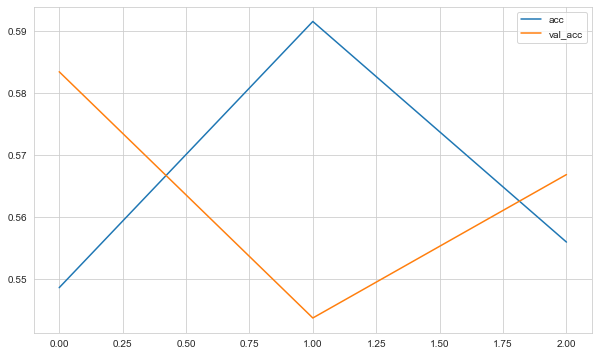

In [65]:
summary[["acc", "val_acc"]].plot();

In [66]:
import tensorflow as tf
tf.config.experimental.list_physical_devices("DML")

[PhysicalDevice(name='/physical_device:DML:0', device_type='DML'),
 PhysicalDevice(name='/physical_device:DML:1', device_type='DML')]

# Modelling-3

In [67]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation="relu"))

model3.add(Dense(64, activation="relu"))

model3.add(Dense(1, activation="relu"))


model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 374, 470, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 374, 470, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 187, 235, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 187, 235, 16)      2320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 187, 235, 16)      64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 187, 235, 32)      4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 187, 235, 32)     

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model3.fit(train_image_gen, 
           epochs=10,
           steps_per_epoch=len(train_image_gen),
           validation_data=validation_image_gen,
           validation_steps=len(validation_image_gen),
           callbacks=[early_stop])

In [ ]:
summary = pd.DataFrame(model3.history.history)

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

# Prediction

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>